# 1. Motivation

## What is our dataset?



For this project it was decided to work with US mass shootings and changes in the stock market of firearm manufacturers.

The data for this project were split up into three different files:

- Data on mass shooting incidents in the US, containing information about location and the number of people hurt and killed. The dataset contains data from 2013 to 2018. The original dataset can be found at: 
https://github.com/jamesqo/gun-violence-data?fbclid=IwAR1X578G1lA9emRe77dqEZ5MFPdpXXip5b2GnkxVNed_vcH-eWKsIBKaRFQ

- Data on stock data of one the largest firearm manufacturers in the US. The stock closing price and trading volume were used. The website from which the original data can be extracted, allows for the user to chose the time period. Therefore, it was decided to extract stock data within the same time interval as the mass shooting data. The original dataset can be found at: https://finance.yahoo.com/quote/AOBC/history?p=AOBC 

- Data on similar stock data as the previous mentioned dataset, but spanning over a longer time period from the 17th of August 1999 to the 15th of May 2019. 


Besides these datasets, information about the presidents, gun control laws and major mass shotings events were added manually.

- President information: https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

- Gun control laws: https://www.thoughtco.com/us-gun-control-timeline-3963620

- Major mass shootings events: https://en.wikipedia.org/wiki/Mass_shootings_in_the_United_States?fbclid=IwAR2icIWCNxFGPLklk7rJtJoPOBv2PaqGiMfZkK5EofOT8KIYPkVZHeQpbJQ

## Why did we choose this/these particular datasets?

The dataset on US mass shooting incidents, has all the relevant information. In order to plot the incidents on a  map, we used geodata locations (longitude and latitude) and provided us with data on fatalities and injuries, so we could depict the extent of the crime. Besides this, the data is easily obtained in a csv file format.

The dataset on firearm manufacturer stock data, is obtained from one of the largest firearm manufatureres;  American Outdoor Brands corparation (AOBC). AOBC owns 18 brands and its principal brand is Smith & Wesson firearms. The dataset contains the relevant information about the stocks (close price and trading volume). Furthermore it is possible to filter the data based on a time interval and download the data as a csv file.

## What was our goal for the user's experience?

The goal for this project is to find potential associations between mass shootings, firearm manufacturers stock market, gun control laws  and elected presidents in the USA.

The goal for the user's experience is, therefore, to provide the user with the ability to explore changes in the stock market prices and volumes in combination with gun related events (shootings, laws, etc.) over a given period of time.

# 2. Basic statistics

As mentioned in the "What is our dataset?" section, this project contains three data files. These files contain a lot of irrelevant information such as mass shooting details and high/ low values of the stock price on different days.

The mass shooting data also contains some rows with missing information. These were also removed in order to only have data where all required fields are present.

The mass shooting dataset contains all shooting incidents in the US from 2013-2018. For this project it was chosen to exclude incidents with less than 5 victims in order to limit the data.

Because of this, the data had to be prepared ("cleaned") so that only the relevant information was kept.

## Data cleaning and preprocessing:


## Mass shooting data clean up:

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Opening original data file

In [26]:
with open('stage3.csv') as infile:
    massShootings = pd.read_csv(infile)

### Filtering the data

In [27]:
massShootings = massShootings[['date','state','city_or_county','n_killed','n_injured','latitude','longitude']]
massShootings['count'] = massShootings['n_killed'] + massShootings['n_injured']
massShootings = massShootings[massShootings['count'] > 4]
massShootings = massShootings.dropna()

### Saving edited data to new data file

In [7]:
massShootings.to_csv('gun.csv')

## Stock data (2013-2018) clean up:

### Opening original data file

In [ ]:
with open('AOBC-3.csv') as infile:
    stocks = pd.read_csv(infile)    

### Filtering the data

In [30]:
stocks = stocks[['Date','Close','Volume']]
stocks = stocks.dropna()

### Saving edited data to new data file

In [31]:
stocks.to_csv('stock.csv')

## Stock data for timeline clean up

### Opening original data file

In [ ]:
with open('AOBC-3.csv') as infile:
    stocksMax = pd.read_csv(infile) 

### Filtering the data

In [ ]:
stocksMax = stocksMax[['Date','Close']]
stocksMax = stocksMax.dropna()

### Saving edited data to new data file

In [ ]:
stocksMax.to_csv('stock.csv')

## Discussion of dataset:


After Cleaning up the mass shooting data it now consists of 753 rows and 8 coloumns in a 121 KB file.

After cleaning up the stock data (2013-2018) it now consists of 1308 rows and 3 coloumns in a 41 KB file.

After cleaning up the stock data (1999-2019) it now consists of 4968 rows and 2 coloumns in a 87 KB file.

It can be, therefore, seen that 238.928 rows and 20 coloumns were removed from the mass shooting data, resulting in 141,88 MB being removed from the mass shooting data. Furthermore, it is made evident that no rows were removed from either of the stock datasets. For the 2013-2018 stock data, 4 coloumns were removed, resulting in 47 KB being removed from the original data file size.
For the 1999-2019 stock data, 5 coloumns were removed resulting in a 228 Kb smaller file.

# 3. Data analysis

Based on analysing the data alone, without any visualizations it is hard to get some actual information about the associations. However based on the result of the cleanup, it is possible to see what attributes the data consists of, which makes it easier to decide on what visualization to make with each dataset.

In [8]:
massShootings.head(10)

,date,state,city_or_county,n_killed,n_injured,latitude,longitude,count
6,2013-01-19,New Mexico,Albuquerque,5,0,34.9791,-106.7160,5
7,2013-01-21,Louisiana,New Orleans,0,5,29.9435,-90.0836,5
9,2013-01-23,Maryland,Baltimore,1,6,39.2899,-76.6412,7
12,2013-01-26,Louisiana,Charenton,2,3,29.8816,-91.5251,5
13,2013-01-26,District of Columbia,Washington,0,5,38.8978,-76.9717,5
15,2013-02-02,Tennessee,Memphis,0,5,35.0803,-89.8871,5
19,2013-02-11,California,Vallejo,1,4,38.1072,-122.2280,5
20,2013-02-11,Delaware,Wilmington,3,2,39.7407,-75.5499,5
21,2013-02-12,Utah,Midvale,4,1,40.6008,-111.9030,5
22,2013-02-19,California,Orange (county),4,3,33.8031,-117.9430,7


In [33]:
stocks.head(10)

,Date,Close,Volume
0,2012-12-31,8.44,4515700
1,2013-01-02,8.54,4875000
2,2013-01-03,8.77,5051200
3,2013-01-04,8.80,3799700
4,2013-01-07,8.64,3773900
5,2013-01-08,8.76,2932200
6,2013-01-09,8.57,3837800
7,2013-01-10,8.26,9120500
8,2013-01-11,8.33,2971100
9,2013-01-14,8.23,3852000


As indicated from the tables above, the mass shooting data consists of the date an incident happened, the state and city of the incident, the number of people injured and killed, the longitude and latitude where the crime happened at and how many were hurt in total during the incident. While the above provide a lot of information about the incident and where it happened, it can be particularly challenging for humans to identify the exact location of where an incident took place in the city, just based on the latitude and longitude. It is also very hard to compare all the entries in the dataset, just based on the table above.

In order for people to actually understand this data, it is, therefore, required to visualize the data in a way, which is readable and more apprehensive for humans.

In order to analyse the data further,a plot showing the amound of mass shootings over time were created. This was done in order to analyse if there is data available in every period from 2013-2018.

In [3]:
with open('data_shootings.csv') as infile:
    massShootings = pd.read_csv(infile)
massShootings = massShootings[massShootings['count'] > 4]    

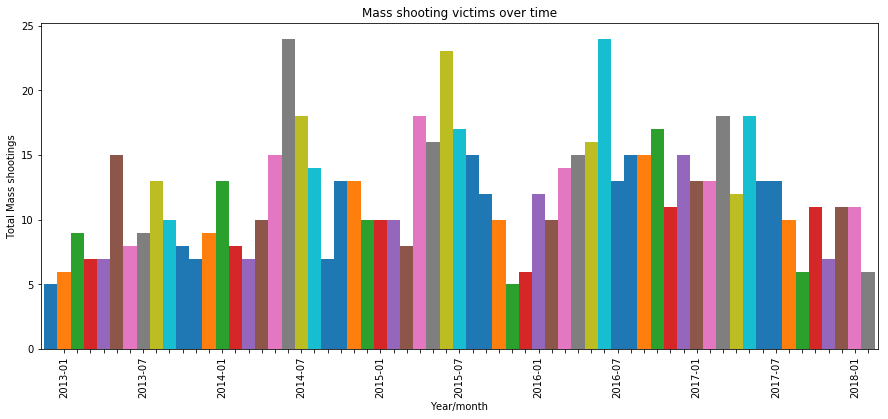

In [4]:
massShootings['ym'] = massShootings['date'].astype(str).str[:7]
MassShootingYm = massShootings.groupby('ym')
MassShootingYm = MassShootingYm.size()

years = massShootings.ym.unique()
ly = len(years)
xtick = [""] * ly
for i in range(0, len(years)):
    if i%6 == 0:
        xtick[i] = years[i]



plt.figure(figsize = (15,6))
MassShootingYm.plot("bar", width=1.0)
plt.xlabel('Year/month')
plt.ylabel('Total Mass shootings')
plt.title('Mass shooting victims over time')
plt.xticks(range(1, ly), xtick)
plt.show()


The plot above shows the amount of mass shootings during the different months from 2013-2018. In the plot above it can be seen that there were mass shootings in every month during this time interval. Because of this, it is possible to make visualizations with the data, where only certain time periods are shown, without risking having no data points available in the plots.

Besides analysing the distribution of mass shootings over time, it was relevant to look at how many victims the different mass shootings had. The reason for this is in order to see if there is data available with both minor and major mass shootings. This plot were also made in order to see how the amount of mass shootings is distributed, as a function of the amount of victims.

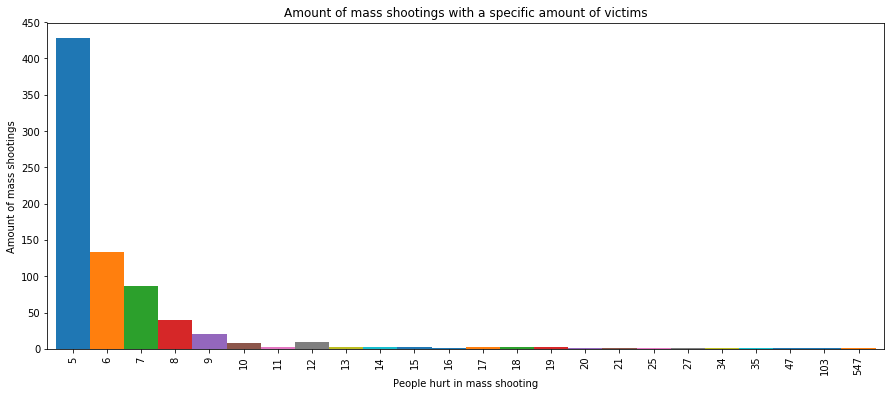

In [5]:
massShootingsvictim = massShootings.groupby('count')
massShootingsvictim = massShootingsvictim.size()

plt.figure(figsize = (15,6))
massShootingsvictim.plot("bar", width=1.0)
plt.xlabel('People hurt in mass shooting')
plt.ylabel('Amount of mass shootings')
plt.title('Amount of mass shootings with a specific amount of victims')
plt.show()

The plot shows that the main part of the mass shootings has under 10 victims. This seems reasonable since most mass shootings are carried out by people who either target certain people, or have a limitted amount of weapons/ammunition with them. During mass shootings reason people tend to flee from the mass shooter, and the police tries to shut it down as soon as possible, which also limits the victims in most shootings. The plot above shows that only two mass shootings in the period btween 2013-2018 has over 100 victims. These two mass shootings are the Orlando night club shooting in 2016 and the las vegas shooting in 2017. 

Based on these informations, the plot tells us that it might be reasonable to take the amount of victims into consideration when making the visualizations, since there are only a few major mass shootings, which are probably also the ones who got most media attention and therefore might have a larger association with the stock market of firearm manufacturers.

No machine learning methods were used for the scope of this project.

# 4. Genre

The visualizations created in this project can be categorized in the interactive slideshow genre. 
The user is assisted in following the narrative of the story by being able to view the original visualizations, but also interact with them though the slideshow.
The original US map with the mass gun crime incidents as well as the timeline of the gun stock prices introduces the user to the story presented. They can immediately understand the matter at hand and are motivated to draw their own conclusions with the additional brushing option. Through this option, the user can view the temporal evolution of the gun manufacturers' stock as in relation to the shootings recorded over the same period in USA. The visualization also gives a geographical distribution of the mass shooting incidents. since it is easy to observe which states have reoccurring incidents over the years.
Finally, the hovering effect provides the user with more details about each event and the severity of the issue is highlighted when the number of victims appears on the bottom of the map.
Therefore, this narrative provides the user with food for thought and they can be encouraged to further investigate this issue and the suggested relation between mass shootings and gun stock prices in the US.

## Which tools did we use from each of the 3 categories (visual narrative)? and why?

#### Visual structuring:
For this project multiple visual structures are used. The first tool used is the progress bar/ timebar. The progress bar is used for this project though the brush bar, which always shows the full time period of the stock plot. The user is able to brush and mark any period on the bar in order to show data from the selcted period in the stock plot and the US map.

Establishing shot/ splash screen is also used to establish the scene of the data and how the two datasets correlate. The main focus of this project is the mass shooting incidents. Therefore, the establishing shot also focuses around the US map.

Consistent visual platform is used by having the same actual plots for each point in the slideshow, with only the data points changing. Color schemes also aim to give a consistent feeling to the different plots.


Checklist is used in combination with the progressbar/ timebar. The checklist structure allows for the user to navigate around the data, while always being aware of what is shown.


#### Highligting:

Feature distinction is used in order to distinguish the different features in the plots. For example, coloring the labels of the timeline with different colors, depending on them showing information about different presidents (Democratic--> Blue, Repblican-->Red), gun control laws (gray) or mass shootings (bold gray).

Besides feature distinction, motion is also used, since the data in the plots change, when interacting with the brush bar.

#### Transition Guidance:

The only transition guidance used for this project is object continuity; The same objects are included in the visualizations no matter how the user interacts with the visualizations. 

## Which tools did we use from each of the 3 categories (narrative structure)? and why?

#### Ordering:
The ordering for this project is Linear since the visualization is done through a slide show which is arranged linearly according to time. It is possible for the user to select any time period on the brush bar, however the temporal data is always linearly arranged through time no matter the user's selection.

#### Interactivity:
In order to interact with the plots, some interactivity tools need to be used. For the visualizations created in the project "Hover Highlighting/ details" were used. The way this is used is that the user can hover over the different mass shootings on the US map in order to see more details about how many people were killed, a link to more information, etc.

For this project "Very limited interactivity" is also used, since the options the user has is very limited. This is done in order to focus on the goal for this project and only allow the user to interact with the graphs in a relevant way. The user is only able to interact with the map-plot through hovering and the brush bar.

The visualization helps the user by both giving explicit instructions on how to navigate the data, but also uses tacit tutorials by using navigation tools which shows always shows the user which time period is currently chosen.

Stimulating default views is also used to capture the users attention to the different plots.

#### Messaging:
Captions / Headlines are used to tell the user what the different plots actually show.

Annotations inform the user about what kind of information is being used; for example, when hovering the data, annotations show additional information about the data.

Multi-messaging is used by giving different pieces of information which can be related to each other. For this project it can be information about how many people died in a mass shooting and information about the stock market of the firearm manufacturer. These two pieces of information are different but can be related to each other. Trying to find these relations is the main goal of this project.

The plots is also accompanied by an introductory text which tells something about what the point of the visualization is and what the different aspects of the visualization show/ how it can be navigated.

For this project some summary is also used, which sums up some of the findings from the visualizations. This gives some examples of places where there seems to be an association between the different data. However, the summary does not contain all information which can be concluded from the visualization, since there is a lot of data to explore. This also allows the user to further explore the data and find more possible associations.

# 5. Visualizations

For this project there were two main aspects on the topic which were visualised. In this section, we will go into depth with the idea behind the the visualizations of choice and how they contribute to the our narrative about correlations with firearm manufacturer stocks.

#### 1) Mapped mass shootings and firearm stock prices and trading volume
A US map was used to visualize the location and the amount of victims of each mass shooting incident in the time period 01-01-2013 to 03-31-2018. Initially the US map depicts all mass shooting incidents over the entire time span. The purpose was to create an overview of the number of mass shootings, their geopgraphical location and to which extend the shootings have claimed victims. A chart was created depicting the changes in the closing stock price and trading volume over the same time period. A brushing function was incorporated in the chart, creating an opportunity to zoom on a time period and brush through the entire timespan. The same date selection was applied to the US map, so that changes in stock data could be discovered simultaneously 
 with mass shooting events. Besides this, a hovering effect was added to the map so that more specific details on the mass shooting incidents could be obtained. The purpose has been to create an interactive visualization, where the zoom and brush effects create an opportunity for the user to explore possible patterns and correlations in the data.


#### 2) Firearms stock prices annotated with historical events

Additionally to the stock data that were used interactively with the mass shooting data set, an even more extended version of the gun stock market prices was utilized. The extended data set consists of the stock closing prices for gun manufacturers in the years between 17-08-1999 and until 15-05-2019. This data set was used to create a line graph of the closing market price recorded for each day during the aforementioned time period. Once the gun stock prices were visualized, annotations of important events were super opposed to the line graph, so that any correlations between these events and the gun stock prices could be illustrated. 

# 6. Discussion

## What went well?
The goal of creating the US map where all the mass shooting incidents are depicted, was accomplished. Besides this a hovering effect where implemented, where detailed information for each occurrence appears, turned out as expected.
The scope of the project, which was to showcase any correlation between the mass shooting incidents and the temporal evolution of the gun stock prices and trading volume, was made possible with the use of the brushing effect.
The relationship between the gun stock prices and major mass shooting incidents as well as the political climate in the US over the years, was highlighted with the timeline review of the gun stock prices over the last two decades.

# Findings

No clear correlation between the stock closing price and the mass shooting events was observed, when using the brushing chart. Spikes in trading volume appeared frequently, but did not have any immediate connection to the mass shootings. 

The visualization of the stock chart spanning over two decades, indicated that gun stock prices were affected by congressional laws and political trends that regard gun control in the US. The prices and volumes of gun manufacturer's stocks exchanged did not seem coincide with the major shooting events.
More specifically, looking at the annotated line graph, one can notice that Donald J. Trump's election coincided with an all-time spike in the gun stock prices (28.45 USD), while Barack H. Obama's election, eight years prior, was accompanied by the exceptionally low gun stock price of 2.85 USD. What is also illustrated by this graph, is that gun stock prices seem to have an increasing trend over the years. In early 2000, when George W. Bush was elected and around the time when 9/11 took place (2001) gun stock prices were constantly low. The prices seem to pick up during the mid-00s, but once again decrease in the following years. This decrease can be attributed to stricter gun control laws voted in the US Congress, such as the National Instant Criminal Background Check Improvement Act, signed on the first day of 2008. Finally, the viewer of this graph would expect for major gun violence incidents to correlate with spikes in the gun stock prices. But this expectation is not proven by the graph. It must noted that not all major gun violence incidents are mentioned in the graph, due to shortage of space and the authors' wish to keep this presentation neat and easy to look at. Be that as it may, examples like the Orlando nightclub shooting in 2016 and the Las Vegas massacre in 2017, do not seem to correlate with any spikes in the gun stock price. What is illustrated clearly, is that politics and, most importantly, legislation have an immediate and fundamental effect on financial indicators, more than the incidents themselves. It is common truth that very few gun violence incidents were followed by radical law changes, hence the little effect on the recorded gun stock prices. The above comments express the authors' conclusions from this graph and the data visualized are open for interpretation by the viewer.

Overall, this effort is considered successful, by the authors.
Be that as it may, gun possession, control and mass shooting events are complex and delicate issues, all deeply rooted in US history and customs. Therefore, this is just an indication and initial effort for correlation between the mass shooting incidents, the politics and the major financial interests involved. There is still a lot of room for improvement both in the matter at hand, but the visualizations descriing and depicting it, too.

## What is still missing? what could be improved? why?

Most of the goals that were initially set for this project, were met. It is, however, possible to improve the work done throughout this project so that is can be easier for the user to look for associations between the firearm stock market and the mass shootings, presidents, etc. Some improvements which could be done in order to improve this project are: 

#### Zooming in functionality
One of the things noticed in hindsight, is that the main focus was given to large time spans, but some changes in stocks are potentially too small to depict on the created charts. 
A way to overcome this issue, would be to create the opportunity for the user to compare more subtle changes in the stock data by zooming in. This functionality, combined with the ability to compare at different points in time could be proven useful and would have added a lot more detail to the narrative.

#### Associated data
Having completed this project, the authors feel that a lot of other factors could be affected or contribute to mass shooting incidents. For example, instead of the gun stock market prices (or in addition to that), the actual amount of citizen purchased guns and ammunition purchased was recorded prior and right after a mass shooting incident. Whether this number would increase of decrease after an incident would showcase a direct cause and effect between the tragic events and the consequential financial aspects of the issue.

#### Adding more relevant information to the timeline
For the scope of this project diferent US presidents, major mass shooting incidents and some gun control laws were added to the timeline. However, there might be other things which could also influence the stock price. 
Examples of these could be acts of terror, certain media stories, etc.
This additional information could potentially lead to some new discoveries of associations to the stock market of the firearm manufacturer.


#### Coloring states accoring to governors.
Another thing which might have a correlation with the amount of mass shootings happening in the different states, is the political party of the seating governor. A way which this could have been highlighted in the visualizations is, if the different states of the US map were colored in red or blue, depending on the party of the seated governor. If this were to be implemented, one thing to account for is that the data for the US map is selected as a time period on the brush bar. This means that a state might have had multiple governors of different parties within the selecte time period.


#### Correlation 
In order to check if mass shooting incidents and the changes in stock data correlate, it would be relevant to create correlation plot, where each attribute; mass shooting event, stock price and trading volume where compared. The challenge could be that a natural delay in stock changes probably would be seen and thereby it making it difficult to see a direct correlation between the different instances.


# 7. Contribution 

#### Andreas
- Data preprocessing 
- Explainer notebook: part 1, 2, 3, 4 and 6. 

#### Anna 
- Observable notebook: visualization 1 - bubble map and brush chart.
- Explainer notebook: part 5 and 6. 

#### Maria
- Observable notebook: visualization 2 - annotated chart.
- Explainer notebook: part 5 and 6. 